<h1><b>EXPLORATORY DATA ANALYSIS ON INSTAGRAMS_REACH DATASET</b></h1>

**IMPORT LIBRARIES**

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**IMPORT DATASET**

In [94]:
df = pd.read_csv("D:\\Downloads\\instagram_reach.csv")

In [95]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [96]:
df.tail()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222
99,12,25,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3 hours,109


In [97]:
df.sample(5)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
14,14,18,ansonmccade,Do you really need #blockchain?,2904,#blockchaintechnology #blockchains #tech#techn...,3 hours,28
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
55,16,24,astrokpj,Was invited to speak at the annual Machine Lea...,3448,#artificialintelligence #machinelearning#bigda...,24 hours,349
34,7,17,gsmusicgroupllc,gsmusicgroupllc#Repost @savageland32with @get_...,226,#youtube #applemusic #itunes#soundcloud #spinr...,2 hours,273
22,22,26,onthetopsearch,“No one buys things from Facebook.” “Instagram...,1041,#digitalmarketing #machinelearning#entrepreneu...,2 hours,20


In [98]:
df.shape

(100, 8)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [100]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [101]:
df.isna().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

**DROP UNWANTED COLUMNS FROM DATASET**

In [102]:
df = df.drop(columns = ['Unnamed: 0', 'S.No'], axis = 1)

In [103]:
df.shape

(100, 6)

**DROP MISSIING VALUES FROM DATASET**

In [104]:
df = df.dropna()

In [105]:
df.isna().sum()

USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

**SPLIT THE COLUMN TIME SINCE POSTED OF DATASET**

In [106]:
df[['Time since posted (hours)', 'Hr']] = df['Time since posted'].str.split(" ", expand = True)

**CHANGE THE DATATYPE OF TIME SINCE POSTED (HOURS) FROM OBJ TO INT**

In [107]:
df['Time since posted (hours)'] = df['Time since posted (hours)'].astype('int')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   USERNAME                   94 non-null     object
 1   Caption                    94 non-null     object
 2   Followers                  94 non-null     int64 
 3   Hashtags                   94 non-null     object
 4   Time since posted          94 non-null     object
 5   Likes                      94 non-null     int64 
 6   Time since posted (hours)  94 non-null     int32 
 7   Hr                         94 non-null     object
dtypes: int32(1), int64(2), object(5)
memory usage: 6.2+ KB


**DROP UNWANTED COLUMNS FROM DATASET**

In [109]:
df = df.drop(columns = ['Time since posted', 'Hr'], axis = 1)

**RENAME THE COLUMN NAME OF USERNAME**

In [110]:
df = df.rename(columns={'USERNAME':"Username"})

In [111]:
df.head()

,Username,Caption,Followers,Hashtags,Likes,Time since posted (hours)
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3


In [112]:
df.to_csv('D:\Insta_Reach\data\insta1.csv')

In [113]:
df.to_excel('D:\Insta_Reach\data\insta1.xlsx')

**DISTRIBUTION OF IMPRESSION FROM FOLLOWERS**

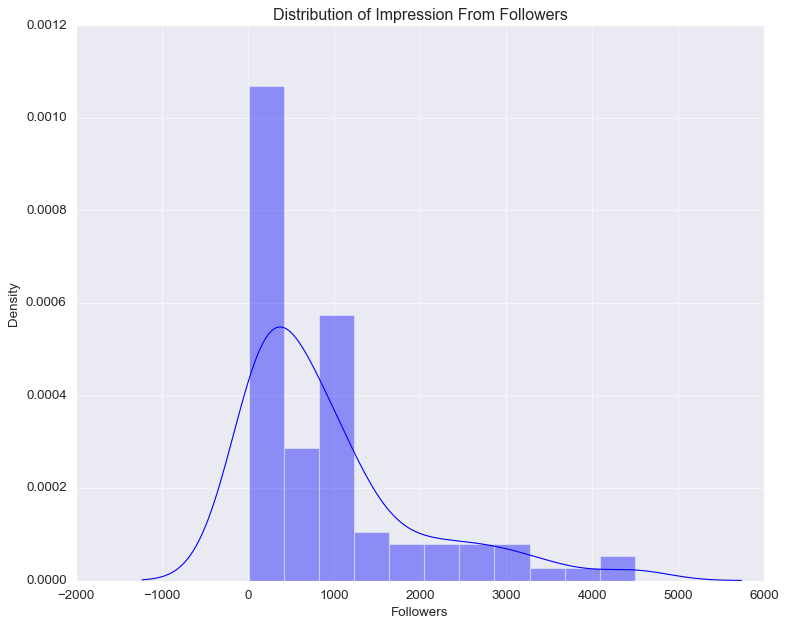

In [114]:
plt.figure(figsize =(10,8))
plt.title("Distribution of Impression From Followers")
sns.distplot(df['Followers'])
plt.tight_layout()
plt.show()

**DISTRIBUTION OF IMPRESSION FROM LIKES**

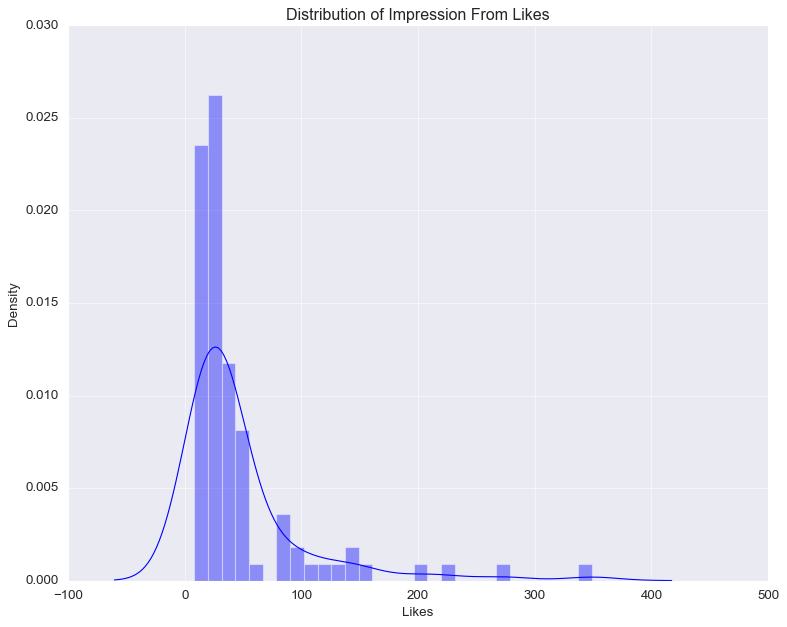

In [115]:
plt.figure(figsize = (10, 8))
plt.title("Distribution of Impression From Likes")
sns.distplot(df['Likes'])
plt.tight_layout()
plt.show()

**DISTRIBUTION OF IMPRESSION FROM TIME SINCE POSTED**

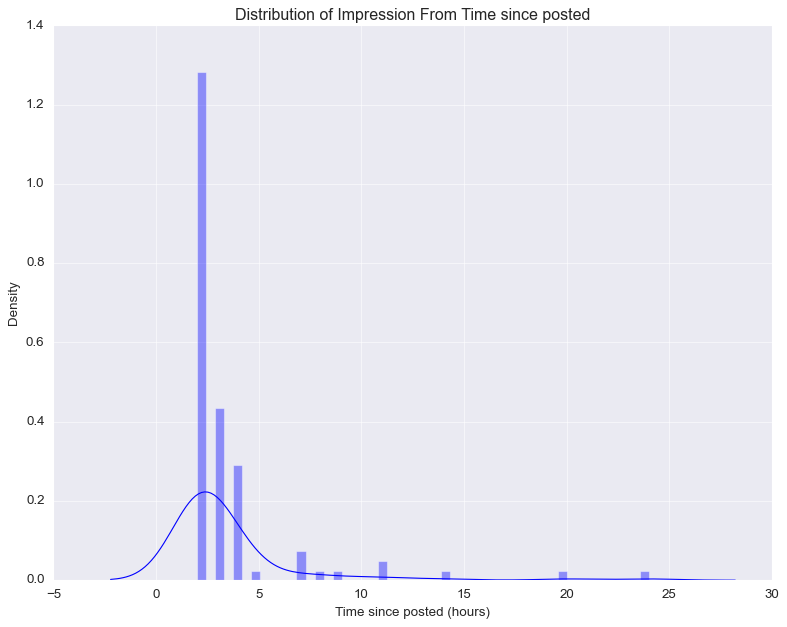

In [116]:
plt.figure(figsize = (10,8))
plt.title("Distribution of Impression From Time since posted")
sns.distplot(df['Time since posted (hours)'])
plt.tight_layout()
plt.show()

**RELATION BETWEEN LIKES AND FOLLOWERS**

In [117]:
followers = df['Followers'].sum()
likes = df['Likes'].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(df, values = values, names = labels, title = "Impression on Instagrams Posts From Various Sources", hole = 0.5)
fig.show()

**PLOTTING WORD-CLOUD FOR HASHTAGS RELATED DATA**

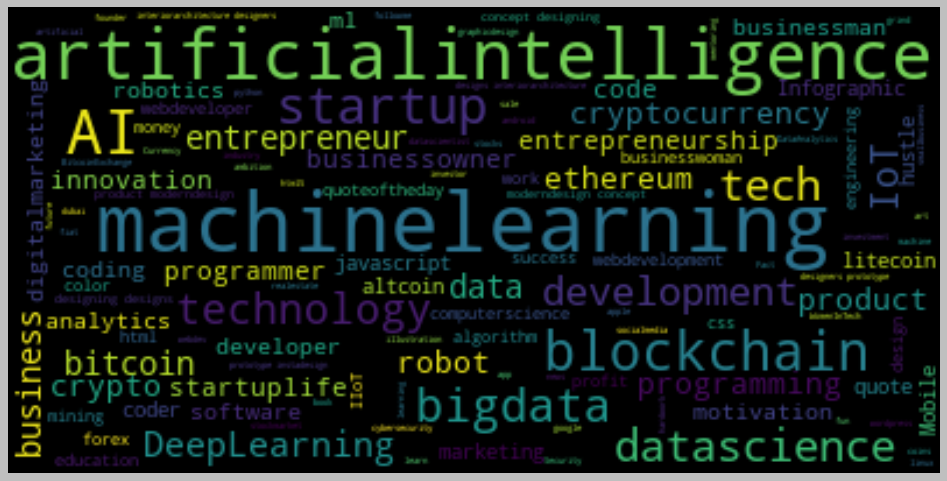

In [118]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(text)
plt.style.use('classic')
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

**PLOTTING WORD-CLOUD FOR USERNAME**

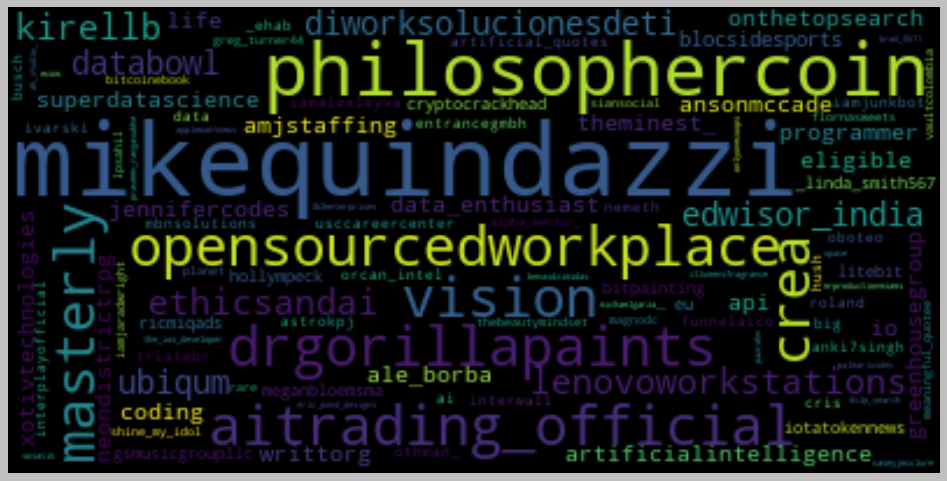

In [119]:
text = " ".join(i for i in df.Username)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(text)
plt.style.use('classic')
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

**PLOTTING WORD-CLOUD FOR CAPTION**

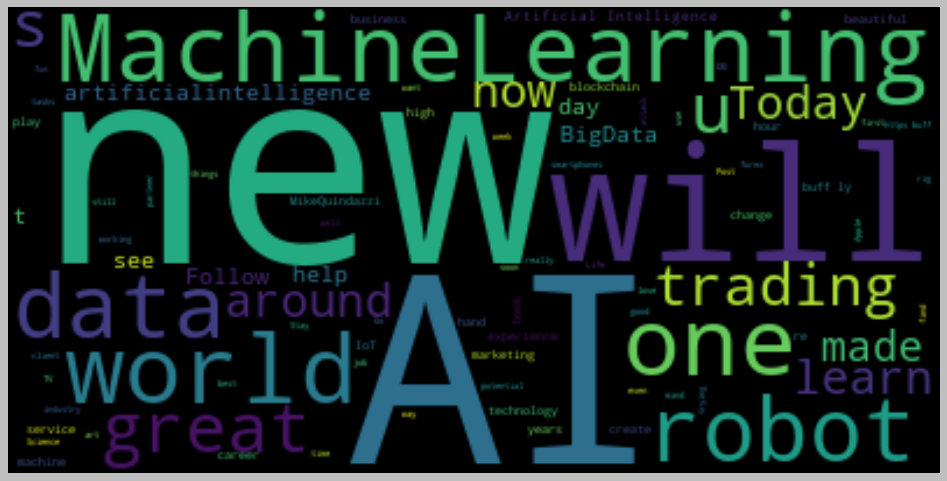

In [120]:
text = " ".join(i for i in df['Caption'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(text)
plt.style.use('classic')
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

**PLOTTING SCATTER-PLOT FOR SHOWING RELATIONSHIP BETWEEN LIKES AND FOLLOWERS**

In [121]:
figure = px.scatter(data_frame = df, x = 'Likes', y = 'Followers', trendline = 'ols', title = 'Relationship Between Likes And Followers')
figure.show()

**RELATIONSHIP BETWEEN TWO VARIABLES**

1. Times since posted in hours and likes

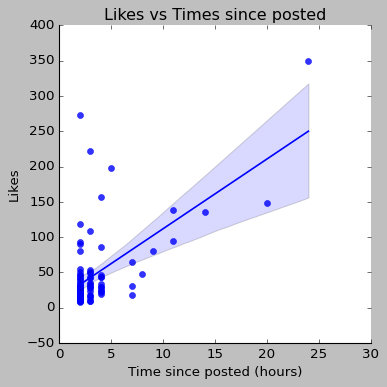

In [122]:
sns.lmplot(x = "Time since posted (hours)", y = "Likes", data = df, fit_reg = True, scatter_kws = {"marker":"D", "s":30})
plt.title("Likes vs Times since posted")
plt.xlabel("Time since posted (hours)")
plt.ylabel("Likes")
plt.tight_layout()
plt.show()

2. Time since posted (hours) vs Followers

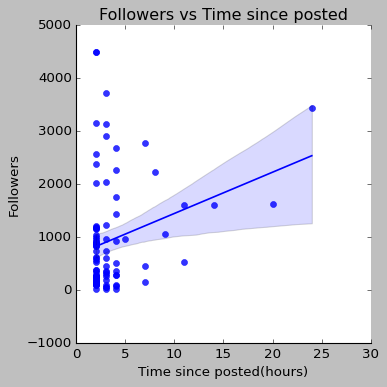

In [123]:
sns.lmplot(x = "Time since posted (hours)", y = "Followers", data = df, fit_reg = True, scatter_kws = {"marker":"D", "s":30 } )
plt.title("Followers vs Time since posted")
plt.xlabel("Time since posted(hours)")
plt.ylabel("Followers")
plt.tight_layout()
plt.show()

In [124]:
num_cols = df.columns[df.dtypes != 'object']

In [125]:
num_cols

Index(['Followers', 'Likes', 'Time since posted (hours)'], dtype='object')

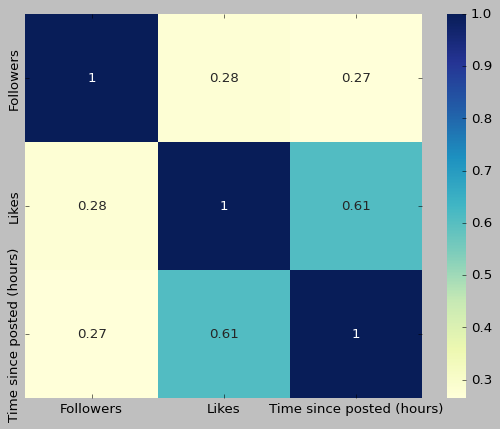

In [126]:
plt.figure(figsize = (8,6))
sns.heatmap(df[num_cols].corr(), cmap = "YlGnBu", annot = True)
plt.show()

- There is strong correlation between Time since posted (hours) and Likes.